In [2]:
import cv2 #importing opencv library

In [3]:
# !pip install DeepFace
from deepface import DeepFace

In [4]:
img = cv2.imread('img1.jpg') 

In [5]:
import matplotlib.pyplot as plt

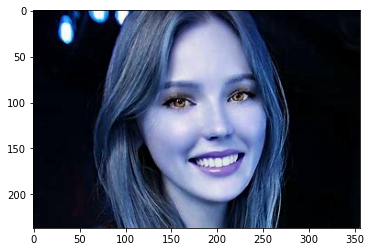

In [6]:
plt.imshow(img) # default in BGR

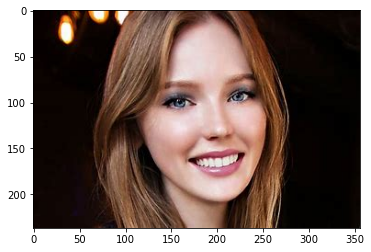

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #converted BGR to RGB 

In [8]:
predictions = DeepFace.analyze(img, enforce_detection=False) 


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:16<00:00,  4.06s/it]


In [9]:
predictions 

{'emotion': {'angry': 7.555618040266004e-10,
  'disgust': 1.0872555677270727e-17,
  'fear': 1.0493859011900548e-09,
  'happy': 96.9609139538356,
  'sad': 1.3003433550058976e-07,
  'surprise': 5.369815632471943e-05,
  'neutral': 3.039034637155213},
 'dominant_emotion': 'happy',
 'region': {'x': 107, 'y': 30, 'w': 172, 'h': 172},
 'age': 31,
 'gender': 'Woman',
 'race': {'asian': 9.415057622419454e-09,
  'indian': 1.1089671542174884e-08,
  'black': 1.4862873572944052e-12,
  'white': 99.99643564224243,
  'middle eastern': 0.0014234514310373925,
  'latino hispanic': 0.002140398464689497},
 'dominant_race': 'white'}

In [10]:
type(predictions)

dict

In [11]:
predictions['dominant_emotion']

'happy'

# We are trying to draw a rectangle across the face

In [12]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml') #getting a haarcascade xml fiile

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())
faces= faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)

    #Draw a rectangle around the faces
for(x, y, w, h) in faces:
    frame= cv2.rectangle(img, (x, y),(x+w, y+h), (0, 255, 0), 1)
    

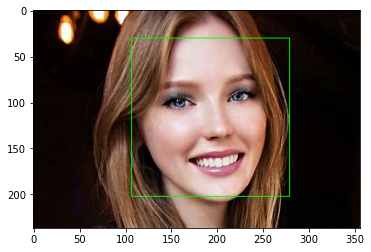

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
           predictions['dominant_emotion'],
           (0,50),
           font, 2 ,
           (0,0,255),
           2,
           cv2.LINE_4) ;

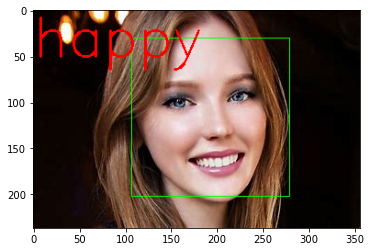

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Real time video demo for Face Emotion Recongnition

In [18]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml') #getting haarcascade xml file
cap = cv2.VideoCapture(0) # requesting the input from the webcam or camera


while(1): 
    ret,frame = cap.read()# read one image from video
    if not ret :
        print('error reading frames..')
        break 
    faces = face_cascade.detectMultiScale(frame,scaleFactor = 1.3, minNeighbors = 4 )
    output = DeepFace.analyze(frame,enforce_detection=False) 
    text = str(' ' + output['dominant_emotion'])
    for (x,y,w,h) in faces :
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,252,0), 2) 
        cv2.putText(frame, 'Emotion : ' + text,(x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0, 225), thickness = 2)
        
    cv2.imshow("Video", frame)
    
    if cv2.waitKey(1) &0xFF==ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.06it/s]
